In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8) # não sei o motivo, mas o use acima reseta o size.

In [2]:
hoteis = pd.read_csv('Ouro Preto e Mariana/hoteis.csv').drop_duplicates()
restaurantes = pd.read_csv('Ouro Preto e Mariana/restaurantes.csv').drop_duplicates()
atracoes = pd.read_csv('Ouro Preto e Mariana/atracoes.csv').drop_duplicates()
print(str(hoteis.shape[0]) + ' hoteis')
print(str(restaurantes.shape[0]) + ' restaurantes')
print(str(atracoes.shape[0]) + ' atracoes')

284 hoteis
547 restaurantes
168 atracoes


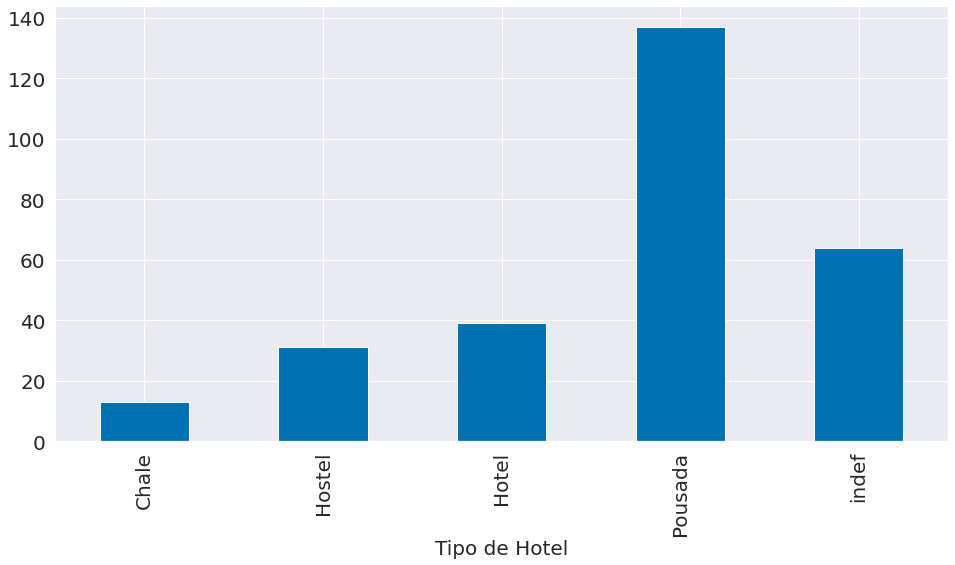

In [3]:
plt.figure(figsize=(16, 8))
ax = hoteis.groupby('tipo')['nome'].count().plot.bar(fontsize=20)
plt.xlabel('Tipo de Hotel')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

In [4]:
avaliacoes_hoteis = pd.read_csv('Ouro Preto e Mariana/avaliacoes-hoteis.csv').drop_duplicates()
avaliacoes_restaurantes = pd.read_csv('Ouro Preto e Mariana/avaliacoes-restaurantes.csv').drop_duplicates()
avaliacoes_atracoes = pd.read_csv('Ouro Preto e Mariana/avaliacoes-atracoes.csv', error_bad_lines=False).drop_duplicates()
print(str(avaliacoes_hoteis.shape[0]) + ' avaliacoes de hoteis')
print(str(avaliacoes_restaurantes.shape[0]) + ' avaliacoes de restaurantes')
print(str(avaliacoes_atracoes.shape[0]) + ' atracoes')

18845 avaliacoes de hoteis
11094 avaliacoes de restaurantes
31988 atracoes
b'Skipping line 2972: expected 10 fields, saw 14\nSkipping line 12553: expected 10 fields, saw 11\nSkipping line 13676: expected 10 fields, saw 11\nSkipping line 20397: expected 10 fields, saw 11\nSkipping line 20884: expected 10 fields, saw 11\nSkipping line 21048: expected 10 fields, saw 11\nSkipping line 21757: expected 10 fields, saw 11\nSkipping line 26818: expected 10 fields, saw 11\nSkipping line 30765: expected 10 fields, saw 16\nSkipping line 31449: expected 10 fields, saw 15\n'


In [5]:
avaliacoes_hoteis_sem_indef = avaliacoes_hoteis[avaliacoes_hoteis['data_avaliacao'] != 'indef']
avaliacoes_hoteis_sem_indef['data_avaliacao'] = pd.to_datetime(avaliacoes_hoteis_sem_indef['data_avaliacao'])
avaliacoes_hoteis_recentes = avaliacoes_hoteis_sem_indef[avaliacoes_hoteis_sem_indef['data_avaliacao'].dt.year > 2014]

avaliacoes_restaurantes_sem_indef = avaliacoes_restaurantes[avaliacoes_restaurantes['data_avaliacao'] != 'indef']
avaliacoes_restaurantes_sem_indef['data_avaliacao'] = pd.to_datetime(avaliacoes_restaurantes_sem_indef['data_avaliacao'])
avaliacoes_restaurantes_recentes = avaliacoes_restaurantes_sem_indef[avaliacoes_restaurantes_sem_indef['data_avaliacao'].dt.year > 2014]

avaliacoes_atracoes_sem_indef = avaliacoes_atracoes[avaliacoes_atracoes['data_avaliacao'] != 'indef']
avaliacoes_atracoes_sem_indef['data_avaliacao'] = pd.to_datetime(avaliacoes_atracoes_sem_indef['data_avaliacao'])
avaliacoes_atracoes_recentes = avaliacoes_atracoes_sem_indef[avaliacoes_atracoes_sem_indef['data_avaliacao'].dt.year > 2014]

In [6]:
gb = avaliacoes_hoteis_recentes.groupby(avaliacoes_hoteis_recentes['data_avaliacao'])['estabelecimento']                                
comentarios_por_dia_hoteis = gb.count()
gb = avaliacoes_hoteis_recentes.groupby(avaliacoes_hoteis_recentes['data_avaliacao'].dt.year)['estabelecimento']
comentarios_por_ano_hoteis = gb.count()

gb = avaliacoes_restaurantes_recentes.groupby([avaliacoes_restaurantes_recentes['data_avaliacao'].dt.year,
                                            avaliacoes_restaurantes_recentes['data_avaliacao'].dt.month])['estabelecimento']                                
comentarios_por_dia_restaurantes = gb.count()
gb = avaliacoes_hoteis_recentes.groupby(avaliacoes_hoteis_recentes['data_avaliacao'].dt.year)['estabelecimento']
comentarios_por_ano_restaurantes = gb.count()

gb = avaliacoes_atracoes_recentes.groupby(avaliacoes_atracoes_recentes['data_avaliacao'])['estabelecimento']
comentarios_por_dia_atracoes = gb.count()
gb = avaliacoes_atracoes_recentes.groupby(avaliacoes_atracoes_recentes['data_avaliacao'].dt.year)['estabelecimento']
comentarios_por_ano_atracoes = gb.count()

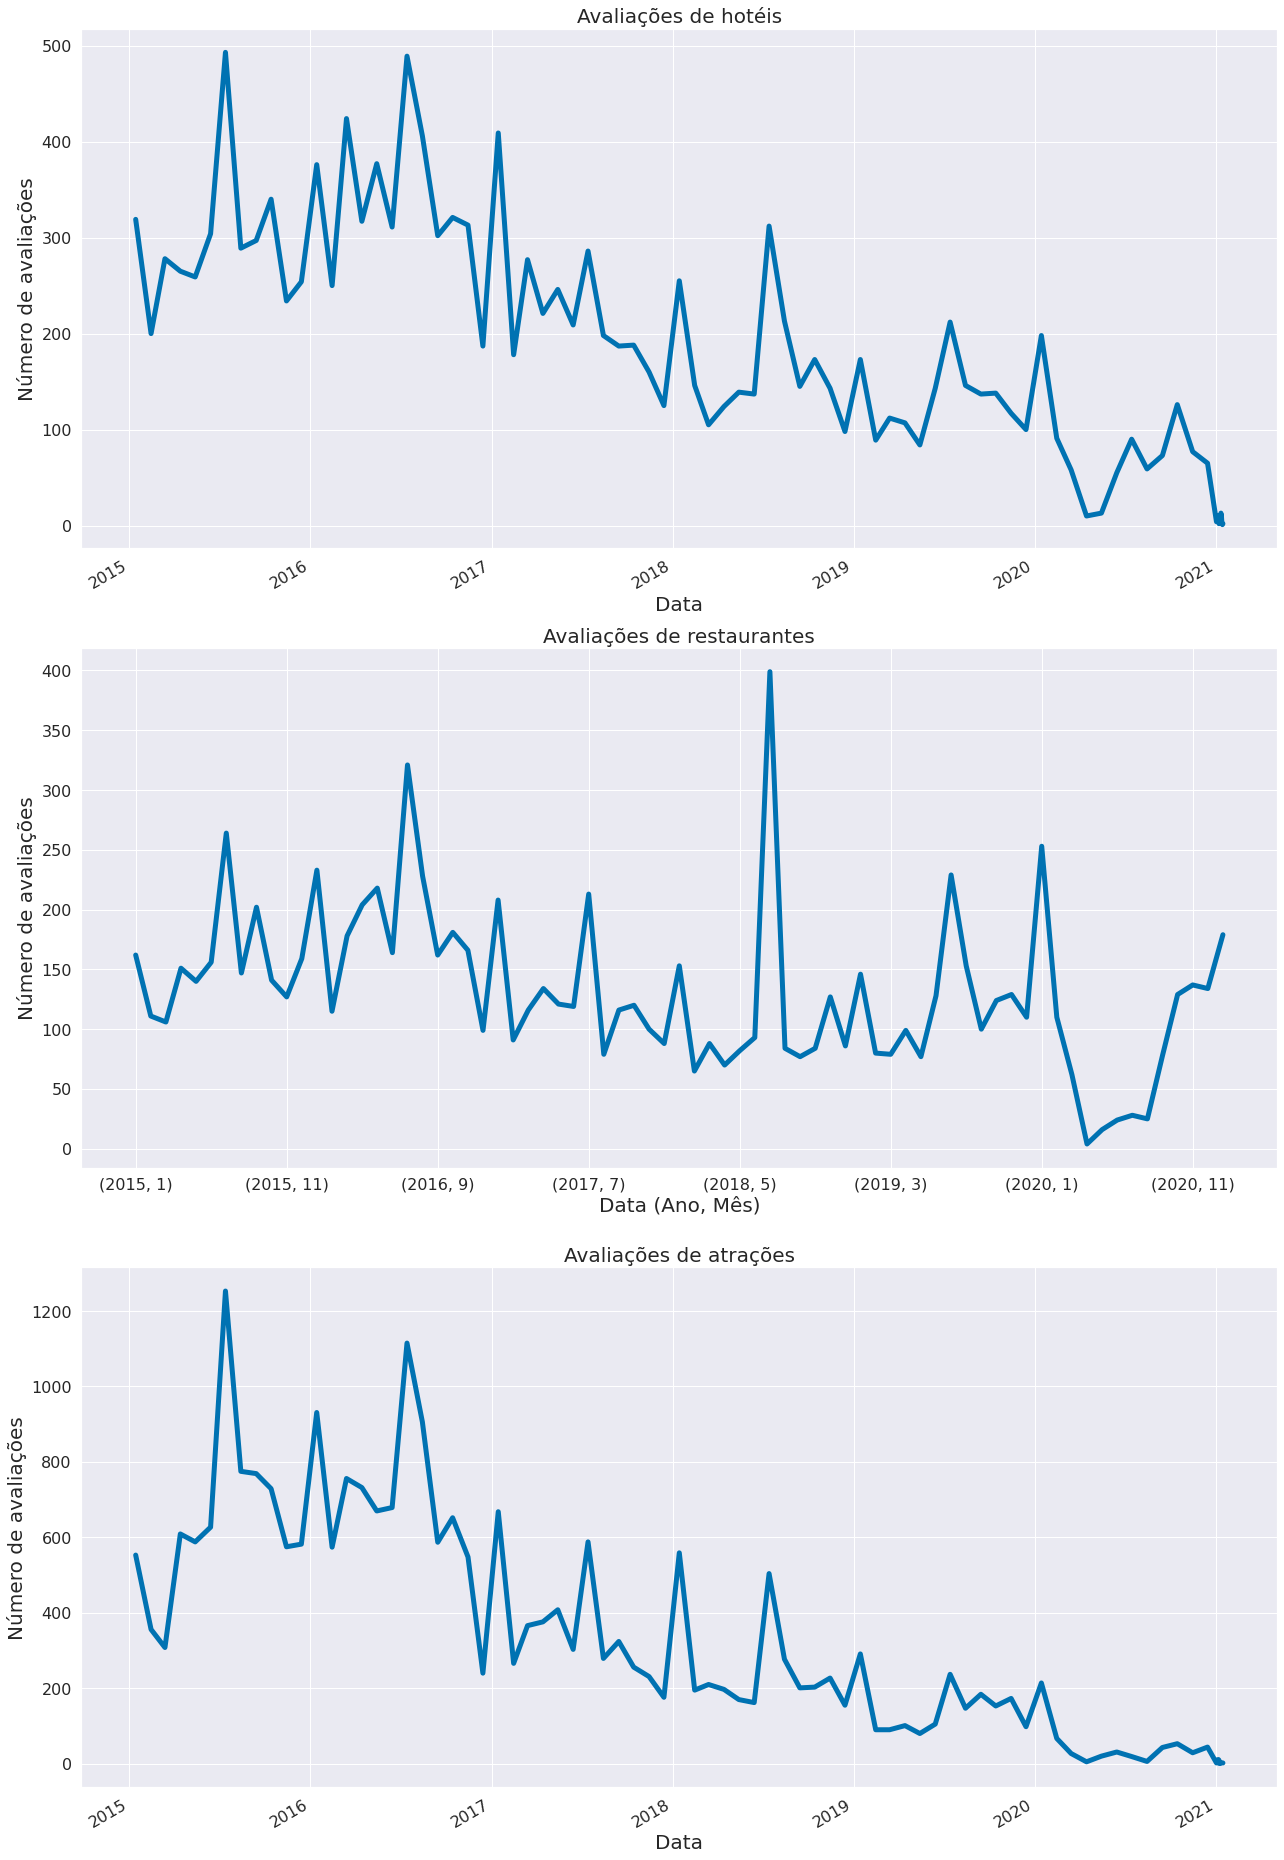

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(18, 26))

comentarios_por_dia_hoteis.plot(ax=ax1, fontsize=16, lw=5)
ax1.set(xlabel='Data', ylabel='Número de avaliações')
ax1.set_title("Avaliações de hotéis")
comentarios_por_dia_restaurantes.plot(ax=ax2, fontsize=16, lw=5)
ax2.set(xlabel='Data (Ano, Mês)', ylabel='Número de avaliações')
ax2.set_title("Avaliações de restaurantes")
comentarios_por_dia_atracoes.plot(ax=ax3, fontsize=16, lw=5)
ax3.set(xlabel='Data', ylabel='Número de avaliações')
ax3.set_title("Avaliações de atrações")

plt.tight_layout()

Text(0, 0.5, 'Número de avaliações')

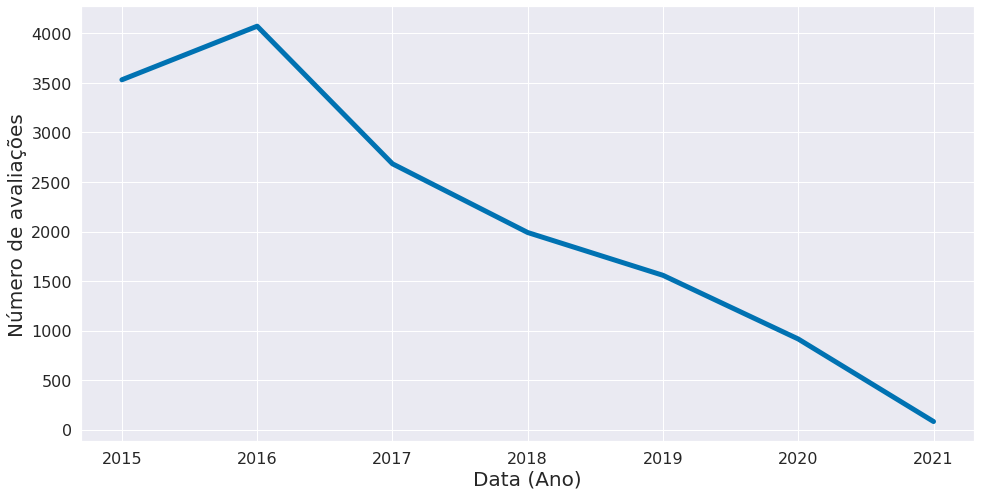

In [19]:
comentarios_por_ano.plot(figsize=(16, 8), fontsize=16, lw=5)
plt.xlabel('Data (Ano)')
plt.ylabel('Número de avaliações')

Text(0, 0.5, 'Número de avaliações')

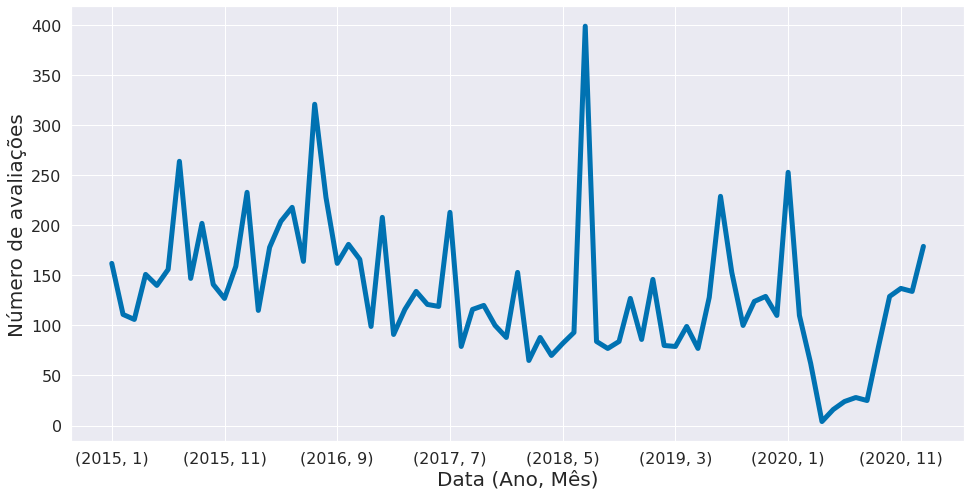

In [10]:
comentarios_por_dia.plot(figsize=(16, 8), fontsize=16, lw=5)
plt.xlabel('Data (Ano, Mês)')
plt.ylabel('Número de avaliações')

Text(0, 0.5, 'Número de avaliações')

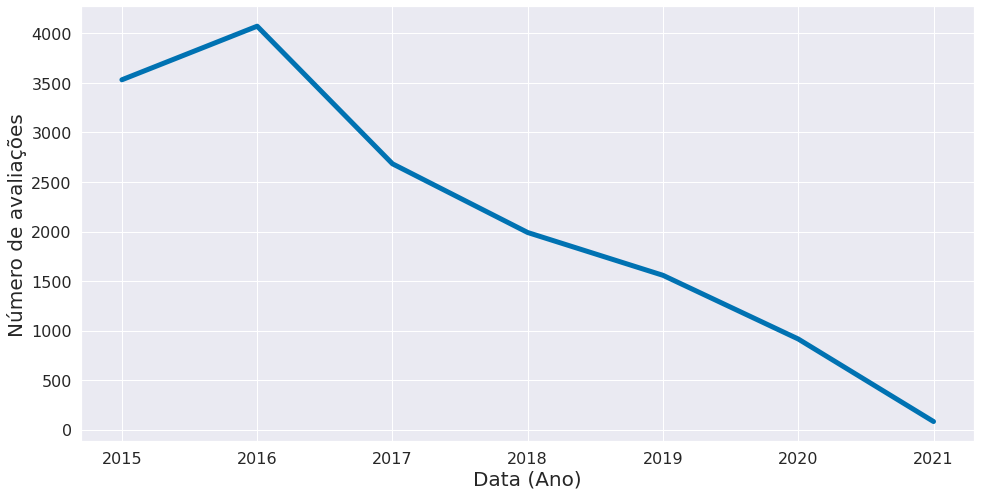

In [11]:
comentarios_por_ano.plot(figsize=(16, 8), fontsize=16, lw=5)
plt.xlabel('Data (Ano)')
plt.ylabel('Número de avaliações')